# Local homology: tutorial

<iframe src="./implemented_variants.pdf" width=200 height=200></iframe>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from gudhi import plot_persistence_diagram
from gudhi.datasets.generators import points
from sklearn import datasets

import matplotlib.pyplot as plt

from local_homology import compute_local_homology_alpha, compute_local_homology_r
from local_homology.alpha_filtration import distance_to_point_outside_ball, distance_to_expanding_boundary, distance_to_boundary
from local_homology.dataset import intersecting_lines
from local_homology.r_filtration import plot_one_skeleton
from local_homology.vis import plot_disc, plot_point_cloud, plot_rectangle

In [3]:
np.random.seed(0)

## Local homology at the intersection of two segments

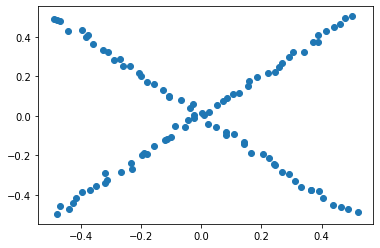

In [4]:
point_cloud = intersecting_lines(100, 0.01)
x0 = np.array([[0., 0.]])
epsilon = 0.2

plot_point_cloud(point_cloud)

### $\alpha$-filtration
We consider the points in the disc and we perform a Vietoris-Rips filtration by growing balls around those points, but also by expanding the boundary inwards.

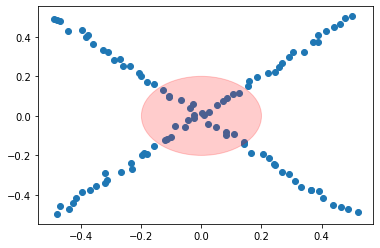

In [5]:
plot_point_cloud(point_cloud)
plot_disc(x0[0], epsilon, color="r", label=r"Neighborhood for $\alpha$-filtr")

usetex mode requires dvipng.


[(0.045958822731903055, 0.13864579351639897),
 (0.0521959177656945, 0.13393729908665797),
 (0.055855601530964735, 0.131045048874002)]

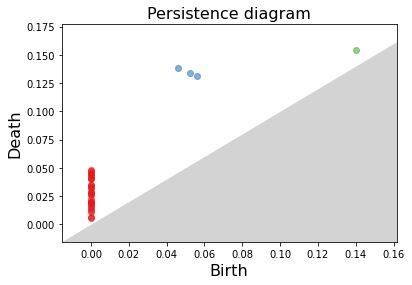

In [6]:
alpha_dgm = compute_local_homology_alpha(point_cloud, x0, epsilon, 2,
                                         distances=distance_to_point_outside_ball)
_ = plot_persistence_diagram(alpha_dgm)
alpha_dgm_1 = [(b, d)for dim, (b, d) in alpha_dgm if dim==1.]
alpha_dgm_1

We see indeed 3 prominent points in $H_1$, what corresponds to the 4 branches coming out from the center.
**Surprisingly, we also see some $H_2$ if we call the fnuction with `max_dimension=2`.**

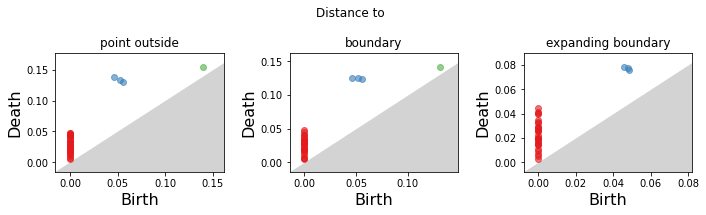

In [7]:
alpha_dgm_boundary = compute_local_homology_alpha(
    point_cloud, x0, epsilon, 2, distances=distance_to_boundary
)
alpha_dgm_expanding = compute_local_homology_alpha(
    point_cloud, x0, epsilon, 2, distances=distance_to_expanding_boundary)

fig, axes = plt.subplots(1, 3, figsize=(10, 3))
_ = plot_persistence_diagram(alpha_dgm, axes=axes[0])
_ = plot_persistence_diagram(alpha_dgm_boundary, axes=axes[1])
_ = plot_persistence_diagram(alpha_dgm_expanding, axes=axes[2])
plt.suptitle("Distance to")
axes[0].set_title("point outside")
axes[1].set_title("boundary")
axes[2].set_title("expanding boundary")
plt.tight_layout()

### $r$ filtration

We fix a Rips-scale $\alpha$ and we build the filtration by considering a smaller and smaller neighborhood around $x_0$.

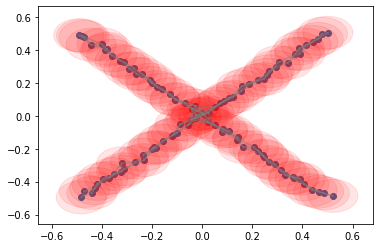

In [8]:
alpha = 0.1

plot_point_cloud(point_cloud)
for x in point_cloud:
    plot_disc(x, alpha, alpha=alpha, color="r", label="_nolegend_")
    # the keyword parameter alpha is the opacity of the circles, no the scale.
plot_one_skeleton(point_cloud, x0, alpha)

[(0.048812097741744664, 0.7108493404190814),
 (0.05766345748647772, 0.6918707286073918),
 (0.06629691053337627, 0.6940869005903981)]

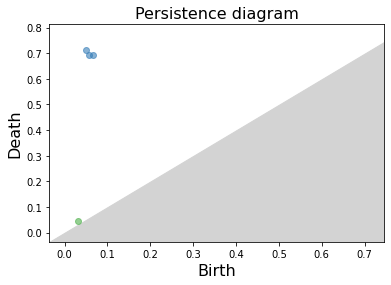

In [9]:
r_dgm = compute_local_homology_r(point_cloud, x0, alpha, 2)
_ = plot_persistence_diagram(r_dgm)
r_dgm_1 = [(b, d)for dim, (b, d) in r_dgm if dim==1.]
r_dgm_1

### Different center
For the chosen parameters, both methods show 3 persistent points, recovering the correct local homology. Let's pick a point where local homology is different.

At $x_1 = (-0.25, -0.25)$, the local homology group in dimension 1 has one generator and groups in all other dimensions are trivial.

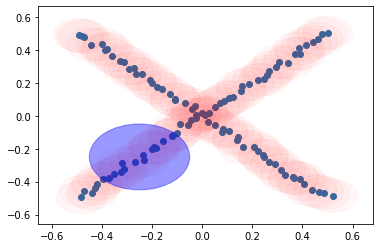

In [10]:
x1 = np.array([[-0.25, -0.25]])

plot_point_cloud(point_cloud)
for x in point_cloud:
    plot_disc(x, alpha, alpha=0.03, color="r", label="_nolegend_")

plot_disc(x1[0], epsilon, alpha=0.4, color="blue")

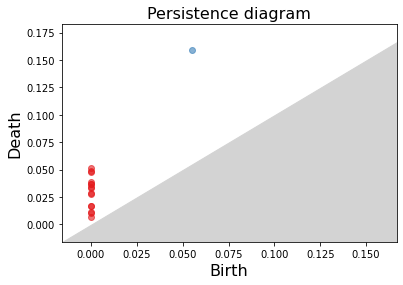

In [11]:
x = x1

alpha_dgm1 = compute_local_homology_alpha(point_cloud, x, epsilon, 2)
_ = plot_persistence_diagram(alpha_dgm1)

There is one (persistent) point in $H_1$, as expected.

[(1, (0.35639592671338705, 0.807101288045817)),
 (1, (0.3788204251646635, 0.777978909816678)),
 (1, (0.02637338134976397, 0.3383875778975901))]

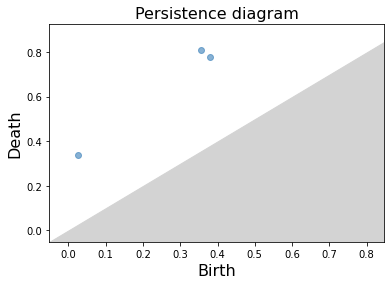

In [12]:
r_dgm1 = compute_local_homology_r(point_cloud, x, alpha, 2)
plot_persistence_diagram(r_dgm1)
r_dgm1

This diagram is more interesting. Remember that we are quotienting by everything but a smaller and smaller neighborhood.

There are three points in total. Two appear, and die, for high parameter values, namely $[0.38, 075]$ is an interval where they both persist. In this particular example, we should be able to see them for $r= 0.6$. Visual inspection confirms that the $r$-ball contains the intersection of lines and so that the points correspond to things happening "far" from the localization point.

The point closer to the origin persists through $(0.03, 0.33)$. Let's inspect $r=0.2$ and $r=0.5$. We see that we recover the correct homology in that interval. The homology can be read-off as the number of points in the rectangle $\rbrack-\infty,r\rbrack\times\rbrack r, \infty\lbrack$ in the diagram.

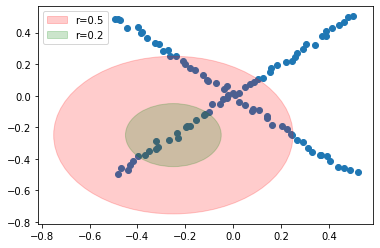

In [13]:
plot_point_cloud(point_cloud)
plot_disc(x[0], 0.5, color="red", label="r=0.5")
plot_disc(x[0], 0.2, color="green", label="r=0.2")
plt.legend()

[(1, (0.35639592671338705, 0.807101288045817)),
 (1, (0.3788204251646635, 0.777978909816678)),
 (1, (0.02637338134976397, 0.3383875778975901))]

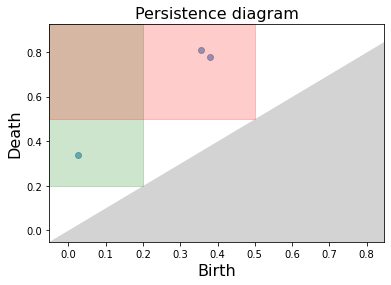

In [14]:
r_dgm1 = compute_local_homology_r(point_cloud, x, alpha, 2)
plot_persistence_diagram(r_dgm1)
plot_rectangle(0.2, color="green")
plot_rectangle(0.5, color="red")
r_dgm1

An interesting question is what happens when we place the point closer to the intersection point, so that the bottom-left endpoint of the segment is outside of the ball while the intersection is still inside. Let us examine that situation for both filtrations.

In [15]:
x = np.array([[-0.21, -0.21]])
r_dgm2 = compute_local_homology_r(point_cloud, x, alpha, 2)
r_dgm2

[(1, (0.30137617893012725, 0.7821845549780713)),
 (1, (0.32645260336848103, 0.7541167381458979)),
 (1, (0.03231596800030978, 0.3949364318873734))]

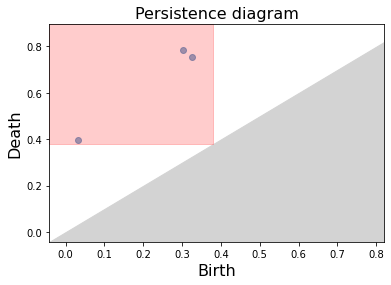

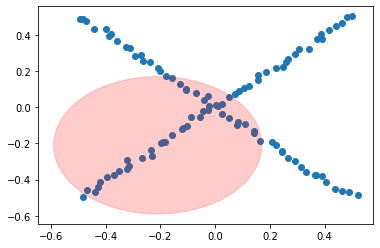

In [16]:
plot_persistence_diagram(r_dgm2)
plot_rectangle(0.38, color="red")

plt.figure()
plot_point_cloud(point_cloud)
plot_disc(x[0], 0.38, color="red", label="r=0.5")

For the $r-$filtration, it does not change much. We have the same number of points, but now, all bars live through (an interval that includes) $[0.33, 0.39]$.

For the $\alpha$-filtration, it does not change anything, since the intersection point is not in the $\epsilon$-ball of the center $(0,0)\notin B(x, \epsilon)$.

## Densely sampled square

In [17]:
np.random.seed(2)

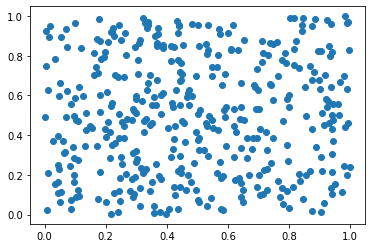

In [18]:
point_cloud = np.random.rand(400, 2)

plot_point_cloud(point_cloud)

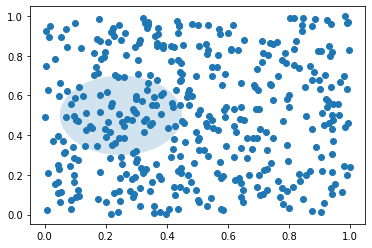

In [19]:
x0 = np.array([[0.25, 0.5]])
epsilon = 0.2

plot_point_cloud(point_cloud)
plot_disc(x0[0], epsilon)

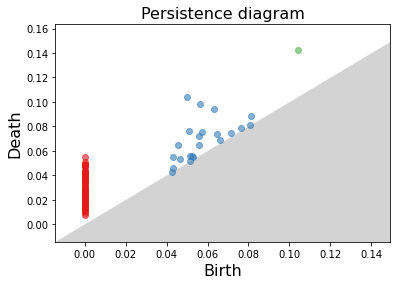

In [20]:
alpha_square = compute_local_homology_alpha(point_cloud, x0, epsilon, 2)
_ = plot_persistence_diagram(alpha_square)

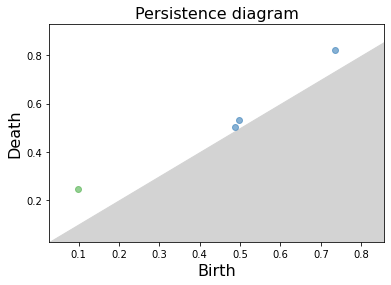

In [21]:
alpha = 0.2
r_square = compute_local_homology_r(point_cloud, x0, alpha, 2)
_ = plot_persistence_diagram(r_square)

In [22]:
r_square

[(2, (0.09897208755867237, 0.2476430049230206)),
 (1, (0.7354952208702841, 0.8200866570190295)),
 (1, (0.4963168031352244, 0.5327108795041019)),
 (1, (0.48736074300891913, 0.5045706455411965))]

Both diagrams show some $H_2$, but it's not very persistent. it dies at 0.24 and it might be because the ball centered at $(0.25, 0.25)$ approaches the boundary $y=0$ of the support of the distribution.

## Sphere

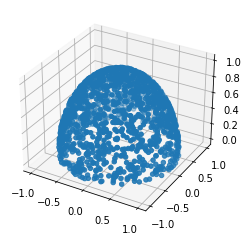

In [23]:
point_cloud = points.sphere(n_samples=3000, ambient_dim=3, radius=1, sample="random")

point_cloud = point_cloud[point_cloud[:,2]>=0.0]
ax = plt.axes(projection='3d')
_ = ax.scatter3D(point_cloud[:,0], point_cloud[:, 1], point_cloud[:, 2],)

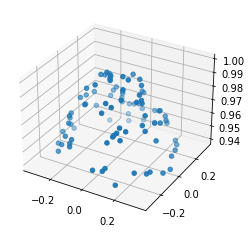

In [24]:
x0 = np.array([[0., 0., 1.]])
epsilon = 0.35

from local_homology.alpha_filtration import is_point_in_ball
in_ball, _ = is_point_in_ball(point_cloud, x0, epsilon, return_distances=True)

pts_in_ball = point_cloud[in_ball]
ax = plt.axes(projection='3d')
_ = ax.scatter3D(pts_in_ball[:,0], pts_in_ball[:, 1], pts_in_ball[:, 2],)

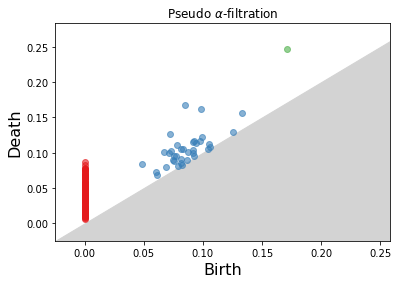

In [25]:
alpha_sphere = compute_local_homology_alpha(point_cloud, x0, epsilon, 2)
_ = plot_persistence_diagram(alpha_sphere)
_ = plt.title(r"Pseudo $\alpha$-filtration")

*Observation: The proposed $\alpha$-filtration with `distances=distance_to_boundary` is equivalent to covering the boundary of the disc with points and performing a Vietoris-Rips filtration.*

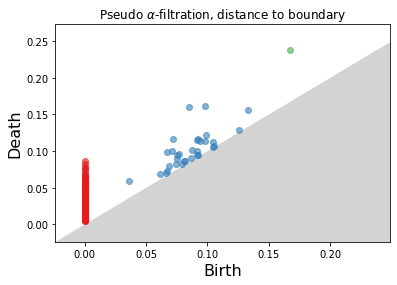

In [26]:
alpha_sphere = compute_local_homology_alpha(point_cloud, x0, epsilon, 2, distance_to_boundary)
_ = plot_persistence_diagram(alpha_sphere)
_ = plt.title(r"Pseudo $\alpha$-filtration, distance to boundary")

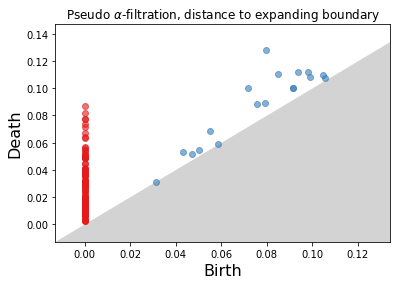

In [27]:
alpha_sphere = compute_local_homology_alpha(point_cloud, x0, epsilon, 2, distance_to_expanding_boundary)
_ = plot_persistence_diagram(alpha_sphere)
_ = plt.title(r"Pseudo $\alpha$-filtration, distance to expanding boundary")

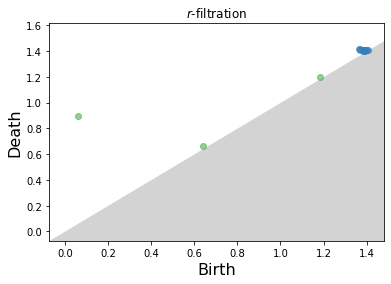

In [28]:
alpha = 0.2

r_sphere = compute_local_homology_r(point_cloud, x0, alpha, 2)
_ = plot_persistence_diagram(r_sphere)
_ = plt.title(r"$r$-filtration")

For the $\alpha$-filtration, the expanding boundary seems to fill out the interior too quickly for $H_2$ to appear. *I* suspect that the points connect to the boundary quicker than they connect to each other, so that no 2-simplices have time to form. Indeed, if we disable this behavior, we observe a non-trivial $2$-dim hole.

Still, we can get an interesting observation from here. By comparing the persistence diagram from `distance_to_boundary` and `distance_to_expanding_boundary`, we can speculate which points in the diagram correspond to cycles that were created by joining the boundary, and which were created purely inside the $r$-ball. For the first category, their birth value will be smaller, while the other ones should see their death values affected.

For the $r-$filtration, this appears immediately quickly and persists. Of course, this is due to a good scale choice for Rips.

## Swiss hole

In [29]:
### from https://github.com/scikit-learn/scikit-learn/blob/main/examples/manifold/plot_swissroll.py
sh_points, sh_color = datasets.make_swiss_roll(
    n_samples=11000, hole=True, random_state=0
)

t = np.array([7.853, 12.5, 12.5])
y = np.array([8., 20., 8.])
pts = np.stack([t*np.cos(t), y, t*np.sin(t)], axis=1)

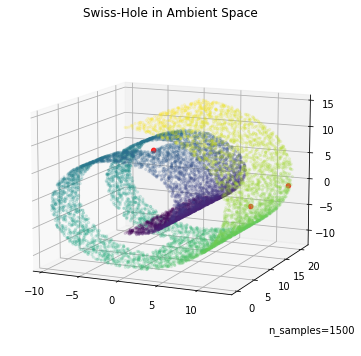

In [30]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
fig.add_axes(ax)
ax.scatter(
    sh_points[:, 0], sh_points[:, 1], sh_points[:, 2],
    c=sh_color, s=5, alpha=0.15
)
ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], c='r', s=20, alpha=0.8)
ax.set_title("Swiss-Hole in Ambient Space")
ax.view_init(azim=-66, elev=12)
_ = ax.text2D(0.8, 0.05, s="n_samples=1500", transform=ax.transAxes)

In [31]:
pt_hole, pt_boundary, pt_inside = pts

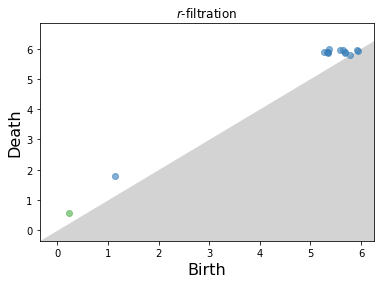

In [32]:
alpha = 0.9
x0 = pt_boundary

r_sphere = compute_local_homology_r(sh_points, x0, alpha, 2, max_r=6.)
_ = plot_persistence_diagram(r_sphere)
_ = plt.title(r"$r$-filtration")

In [33]:
epsilon = 1.
dgms = [compute_local_homology_alpha(sh_points, x0[None,:], epsilon, 2) for x0 in pts]

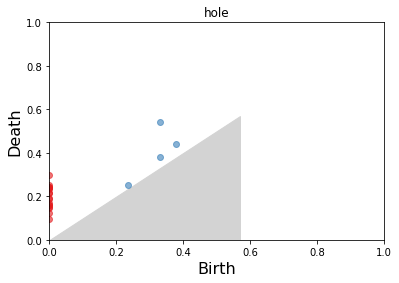

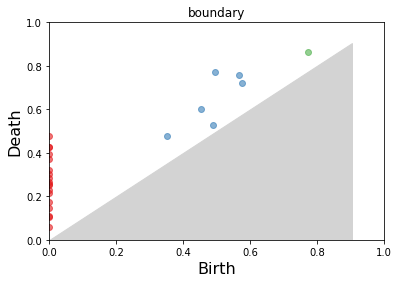

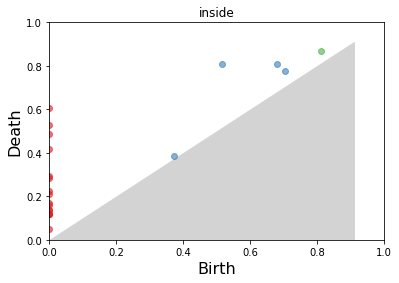

In [34]:
min_, max_ = 0., epsilon
for dgm, name in zip(dgms, ["hole", "boundary", "inside"]):
    ax = plot_persistence_diagram(dgm, )
    ax.set_xlim([min_, max_]),
    ax.set_ylim([min_, max_])
    ax.set_title(name)